# Using clinical symptoms to accurately predict type 2 DM

### Introduction

   This notebook attempts to use multiple supervised machine learning approaches such as KNN, Logistic regression, SVM and Decision trees to diagnose Diabetes Mellitus by solely relying on clinical symptoms and not on traditional laboratory investigations like FBS (fasting blood sugar)/ PPBS (Post prandial blood sugar)/ HbA1c (glycated hemoglobin).
    
   This approach has multiple use cases. It can be used to screen patients for DM before their doctors appointments thereby aiding in the early diagnosis of DM , it can enable the mass screening of populations which have difficulty accessing doctors or other medical resources. The early diagnosis of DM can help prevent or atleast delay the development of complications such as diabetic retinopathy, nephropathy and neuropathy thus improving the quality of life of the patients.
    
   These machine learning approaches can be easily deployed via mobile applications or online questionnaries thereby improving accessibiliy and reducing the burden on heathcare systems by decreasing the number of doctors consultations and laboratory tests taken. This will allow our physicians to focus on more complex cases.

The given dataset was collected via directly administered questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh, and was later approved by a doctor.
Creators:
1) Queen Mary University of London, United Kingdom: M M Faniqul Islam

2) Metropolitan University Sylhet, Bangladesh: Rahatara Ferdousi,

3) Metropolitan University Sylhet, Bangladesh: Sadikur Rahman and Humayra

4) Metropolitan University Sylhet, Bangladesh: Yasmin Bushra

The attribute information:
1) Age: 20-65

        The dataset initially contained a few patients whos age was below 20, but they have been removed as these younger patients are more likely to have type 1 DM.
        
2) Sex: Male/Female

        This feature was removed as the number of sampled non diabetic females was extremely low when compared to the dibetic females, this resulted in a spurrious correlation between gender and the predicted variable.
        
3) Polyuria: Yes/No

          Polyuria due to a glucose-induced osmotic diuresis in patients with hyperglycemia. This means that as more glucose is present in the blood stream, the glucose content in the renal filtrate also increases and the osmotic pull of these increased glucose molecules causes more water to be excreted out.
          
4) Polydipsia: Yes/No

           Due to polyuria, the body becomes dehydrated and more water is required to maintain homeostasis.
           
5) sudden weight loss: Yes/No

           Insuline is responsible for the uptake of glucose into cells for utilization. But when this mechanism becomes impared due to insuline resistance, the energy substrate shifts from carbohydrate to fat. This results in loss of weight. 
           
6) weakness: Yes/No

             Fatigue is a frequently encountered symptom in the general practice management of diabetes. The patient may complain of weakness in such cases.
             
7) Polyphagia: Yes/No

              Although plenty of glucose is present in the blood stream, due to insuline resistance, the uptake of glucose into the cells is decreased and the cells are starved. This results in increased hunger.
              
8) Genital thrush: Yes/No

               High blood glucose levels promote yeast proliferation and also interferes with immune responses in the host, thus diabetics are more prone to genital thrush than non diabetics.
               
9) visual blurring: Yes/No

                   The main reasons for loss of vision in patients with diabetes mellitus are diabetic macular edema and proliferative diabetic retinopathy. This presents clinically as visual blurring.
                   
10) Itching: Yes/No

                   Itch in diabeteic patients is mainly due to skin xerosis and diabetic polyneuropathy, multiple papers have reported its prevalance from 18.4% to 27.5% of all diabetic cases.
                   
11) Irritability: Yes/No

                  There is a long‐standing interest in the association between glucose variability (GV) and mood in persons with diabetes. Empirical evidence regarding this association has not been systematically reviewed.
                  
12) delayed healing: Yes/No

                   Wound healing is a dynamic and complex biological process that can be divided into four partly overlapping phases: hemostasis, inflammation, proliferative and remodeling. Diabetes mellitus causes impaired wound healing by affecting the biological mechanisms of these processes by inducing chronic inflammation, micro- and macro-circulatory dysfunction, hypoxia, autonomic and sensory neuropathy, and impaired neuropeptide signaling.
                   
13) partial paresis: Yes/No

                     Mononeuropathies. Also called focal neuropathies, these are more common in people with diabetes and involve damage to a single nerve.It may affect the shoulder, hand, leg, feet or face and may be caused by pressure on a nerve. This can cause weakness, pain, numbness or even paralysis 
                      
14) muscle stiffness: Yes/No

                  ATP is required to lower myoplasmic calcium levels inorder to relax the muscles and since ATP production is decreased in diabetic individuals, the patients ability to relax their muscles is reduced thus leading to muscle stiffness.
                  
15) Alopecia: Yes/No

                While some studies have shown that Type 2 diabetes was associated with an increased risk of severe central scalp hair loss, alopecia is strongly correlated with gender as it is much more common in men than women. Since our datasets gender distribution is skewed, the spurrious correlation between gender and diabetes spills over into the correlation between alopecia and diabetes.Therefore we have removed the alopecia feature as well.
                
16) Obesity: Yes/No

                Body mass index has a strong relationship to diabetes and insulin resistance. In an obese individual, the amount of NEFA, glycerol, hormones, cytokines, proinflammatory substances, and other substances that are involved in the development of insulin resistance are increased. Insulin resistance with impairment of β-cell function leads to the development of diabetes.
                
17) Class: Positive/Negative

                 Indicates the presence or absence of diabetes
                       

### 1. Data Description

The required packages are first imported. Then the dataset is read via .read_csv function and loaded into a pandas dataframe called data. The data types and distribution is assesed via the .dtypes and .describe command.

In [1]:
import pandas as pd, numpy as np , seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath = 'D:\DATA SCIENCE\DS PROJECTS\proj 1 dm\diabetes core2.csv'
data = pd.read_csv(filepath,sep =',')

In [3]:
data.dtypes
data.dtypes.value_counts()

object    16
int64      1
dtype: int64

In [4]:
data.describe()

,Age
count,519.000000
mean,48.090559
std,12.081348
min,25.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,90.000000


In [5]:
data.describe(include='object')

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,327,262,286,303,305,283,403,286,266,393,280,295,324,340,431,319


In [6]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### 2. Data Cleaning

The total number of null values is first calculated. In this case there are no null values in the entire dataset, we can use the .info function to identify the columnwise distribution of NaN values.

In [7]:
data.isnull().sum().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 519 non-null    int64 
 1   Gender              519 non-null    object
 2   Polyuria            519 non-null    object
 3   Polydipsia          519 non-null    object
 4   sudden weight loss  519 non-null    object
 5   weakness            519 non-null    object
 6   Polyphagia          519 non-null    object
 7   Genital thrush      519 non-null    object
 8   visual blurring     519 non-null    object
 9   Itching             519 non-null    object
 10  Irritability        519 non-null    object
 11  delayed healing     519 non-null    object
 12  partial paresis     519 non-null    object
 13  muscle stiffness    519 non-null    object
 14  Alopecia            519 non-null    object
 15  Obesity             519 non-null    object
 16  class               519 no

A new dataset called duniq is created where the number of unique values in each column is stored, a subset of this dataframe is created where the number of unique values is 2. This is a dataset containing all the binary columns. Label Binarizer is then used for feature engineering, i.e convert the binary categorical variables into 0 and 1, which allows for further manipulations.

In [9]:
duniq= data.nunique()
data.nunique()

Age                   50
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [10]:
binary_variables= list(duniq[duniq ==2].index)
binary_variables

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [11]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
for column in binary_variables:
    data[column] = lb.fit_transform(data[column])

In [12]:
data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,48.090559,0.630058,0.495183,0.448940,0.416185,0.587669,0.454721,0.223507,0.448940,0.487476,0.242775,0.460501,0.431599,0.375723,0.344894,0.169557,0.614644
std,12.081348,0.483255,0.500459,0.497866,0.493401,0.492729,0.498426,0.416997,0.497866,0.500325,0.429174,0.498918,0.495777,0.484776,0.475792,0.375605,0.487149
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.Data Exploration

Data exploration is usually done by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap. But since we are assessing the relationship between categorical variables we shall use chi-square.

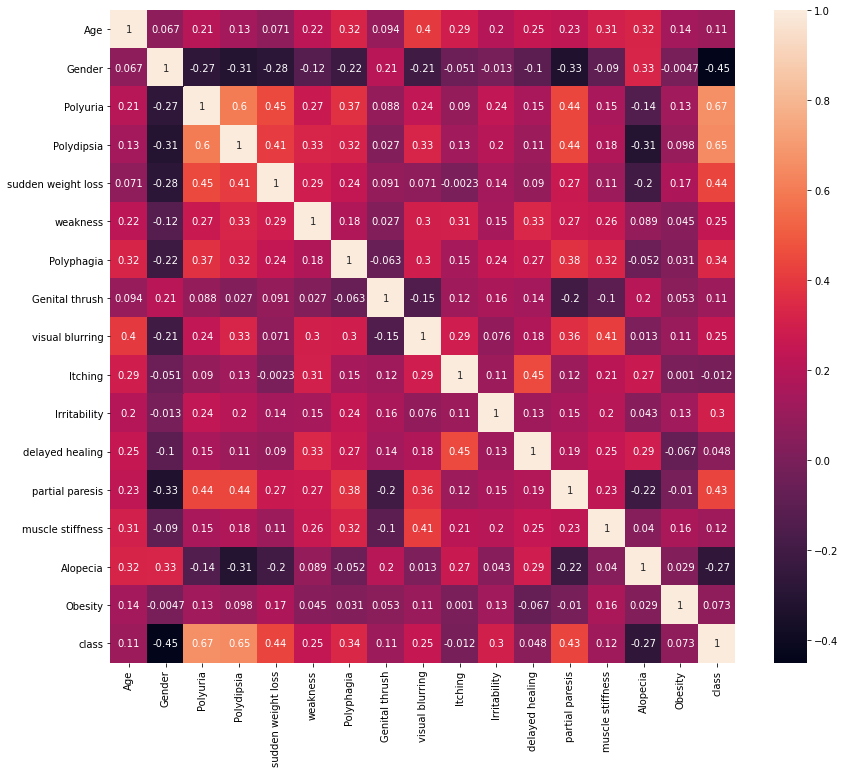

In [13]:
fig, ax = plt.subplots(figsize=(14,12))  
dataplot = sns.heatmap(data.corr(), annot=True, ax= ax)

In [14]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2

factors_paired = [(i,j) for i in data.columns.values for j in data.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(data[f[0]], data[f[1]]), correction = False)   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)

chi2 = np.array(chi2).reshape((17,17)) 
chi2 = pd.DataFrame(chi2, index=data.columns.values, columns=data.columns.values) 

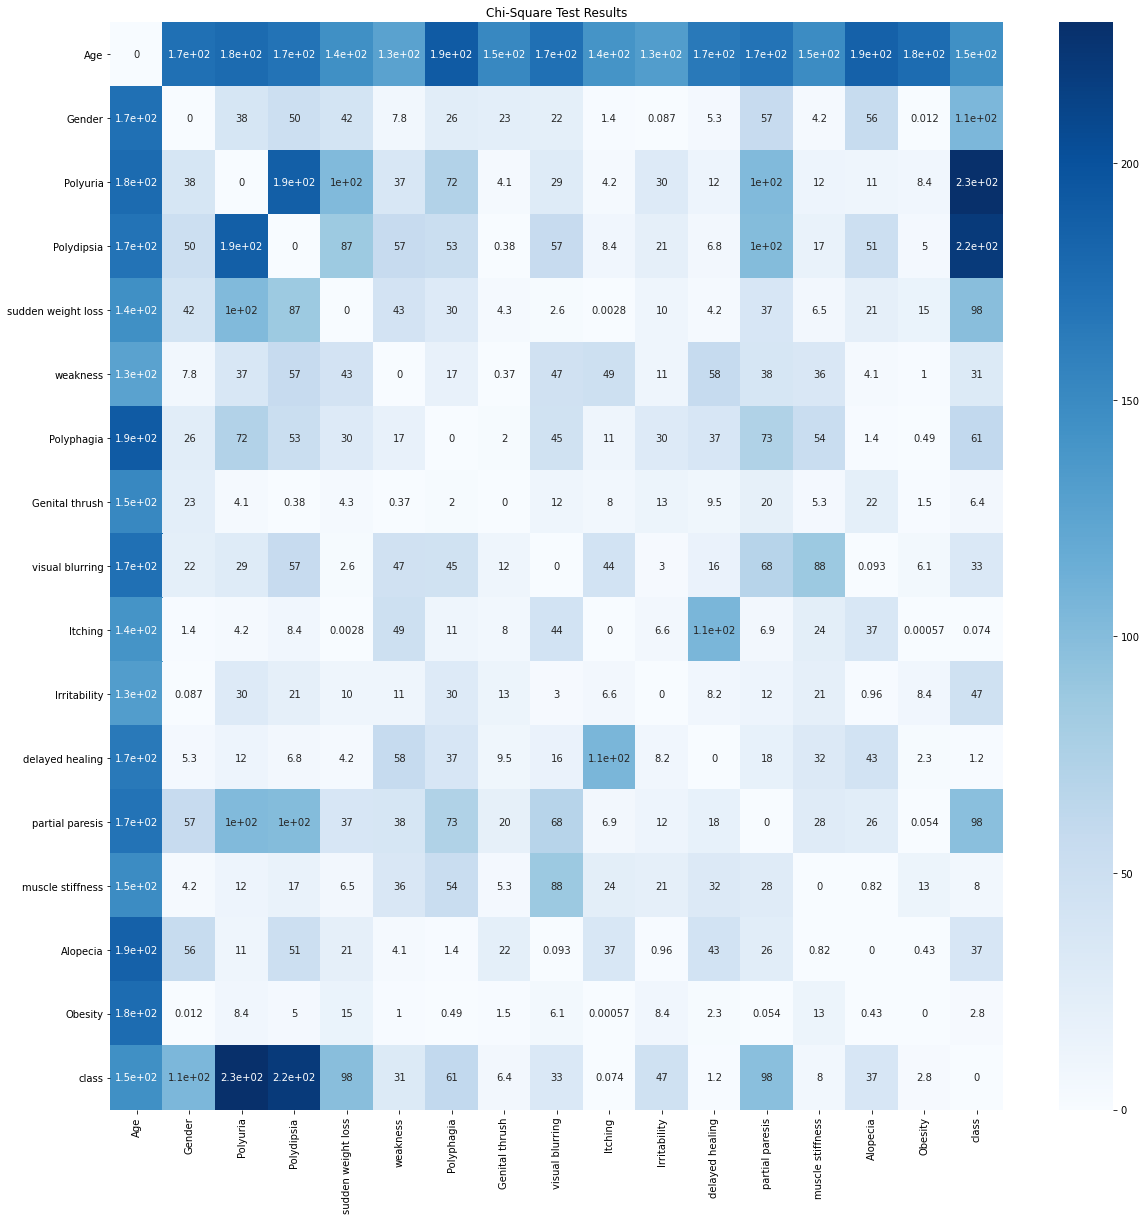

In [15]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(chi2, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

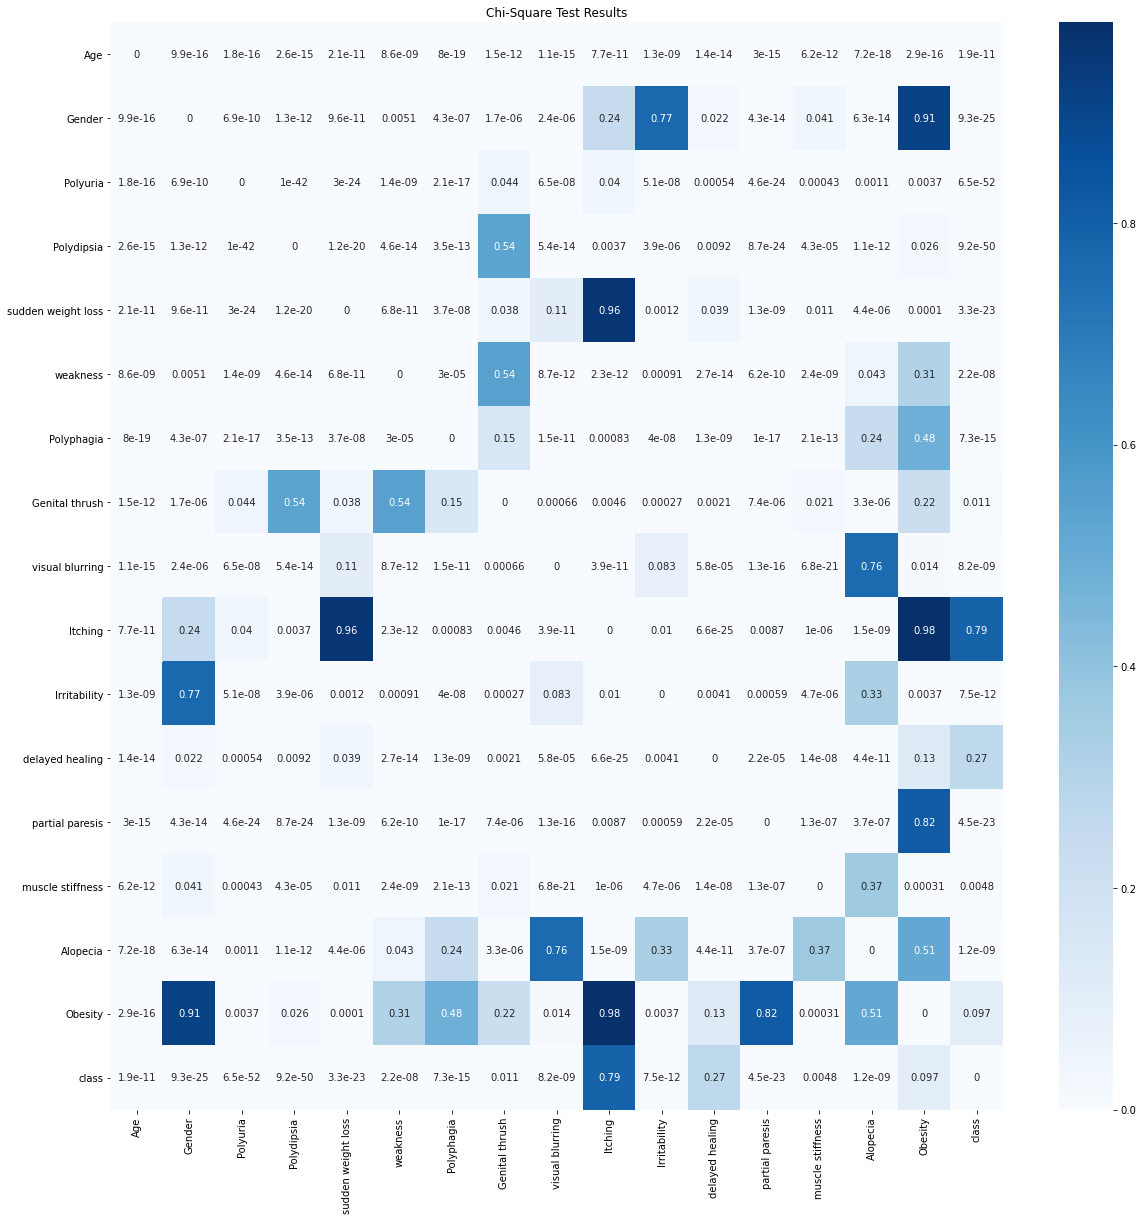

In [16]:
fig2 = plt.figure(figsize=(20,20))
p_values = np.array(p_values).reshape((17,17)) # shape it as a matrix
p_values = pd.DataFrame(p_values, index=data.columns.values, columns=data.columns.values)
sns.heatmap(p_values, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

Due to poor correlation between itching and delayed healing with the class variable, we shall drop those 2 variables as well. Itching can be present in a varienty of conditions and is therefore a non specific symptom. Delayed healing may also occur due to multiple reasons including stress, smoking, increased age, poor peripheral circulation, obesity, malnutrition and can also be classified as non specific.

Obesity also seems to be poorly correlated with diabetes, but due it is importance in previous research and its borderline position to chi^2 critical value at p=0.05 , 3.84, I have decided to retain this feature.

In [17]:
data =data.drop(['Itching','delayed healing'],axis=1)

According to the correlation matrix, there is a strong association between gender and class ,being male is associated with a significantly decreased likelihood of being diabetic. This finding is inconsistent with medical literature. On further exploration of the data it was found that non diabetic women have been undersampled which caused a spurious negative correlation. Thus the gender column was dropped.

The feature alopecia was also dropped, as it is highly correlated with gender and was acting as a proxy for gender. Moreover alopecia only has a weakly established theoretical assosiation with diabetes.

In [18]:
gsubset =data[["Gender","class"]]
df_grpo= gsubset.groupby(["Gender"],as_index = False).mean()
df_grpo

,Gender,class
0,0,0.901042
1,1,0.446483


In [19]:
data_crosstab = pd.crosstab(data["Gender"],
                            data["class"], 
                               margins = False)
print(data_crosstab)

class     0    1
Gender          
0        19  173
1       181  146


In [20]:
data_crosstab2 = pd.crosstab(data["Gender"],
                            data["Alopecia"], 
                               margins = False)
print(data_crosstab2)

Alopecia    0    1
Gender            
0         165   27
1         175  152


In [21]:
data =data.drop(['Gender','Alopecia'],axis=1)

The correlations are arranged in the ascending order to determine the importance of the different features.

Inorder to rule out any multicollinearity, the Variance inflation factor is calculated. All the values are below 10 indicating the absence of significant multicollinearity.

In [22]:
y= data['class']
fields = list(data.columns[:-1])
corr = data[fields].corrwith(y)
corr.sort_values(inplace= True)
corr

Obesity               0.072919
Genital thrush        0.111202
Age                   0.113530
muscle stiffness      0.123800
weakness              0.245573
visual blurring       0.253023
Irritability          0.300602
Polyphagia            0.341438
partial paresis       0.434191
sudden weight loss    0.435617
Polydipsia            0.651007
Polyuria              0.665439
dtype: float64

In [23]:
nonage_data= data.drop(['Age'], axis =1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = nonage_data.columns
vif_data["VIF"] = [variance_inflation_factor(nonage_data.values, i)
                          for i in range(nonage_data.shape[1])]
vif_data

,feature,VIF
0,Polyuria,4.286142
1,Polydipsia,3.750154
2,sudden weight loss,2.444509
3,weakness,2.742756
4,Polyphagia,2.478379
5,Genital thrush,1.391625
6,visual blurring,2.618632
7,Irritability,1.584558
8,partial paresis,2.793329
9,muscle stiffness,2.155859


## 4. Pre-processing

The outcome variable ,class, is plotted to check whether it is balanced or not. In this case, the variable is unbalanced with the minority class being non diabetic individuals. 

The dataset is split into the x and y group, i.e independent and dependent variables. 

The age feature is standardized using the Minmaxscaler, the rest of the features are already between 0 and 1 and therfore remain undisturbed. 

The data is then split into test and train groups using the StratifiedShuffleSplit in order to maintain the ratio of diabetic and nondiabetic cases in both the train and test set.

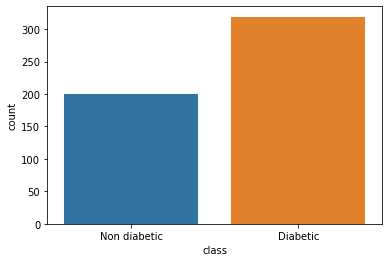

In [24]:
import warnings
warnings.filterwarnings("ignore")
data['class'].value_counts()
plot1 = sns.countplot(data['class'])
plot1.set_xticklabels(['Non diabetic','Diabetic'])
plt.show()

In [25]:
y = data['class']
x = data[data.columns[:-1]]

In [26]:
data.dtypes

Age                   int64
Polyuria              int32
Polydipsia            int32
sudden weight loss    int32
weakness              int32
Polyphagia            int32
Genital thrush        int32
visual blurring       int32
Irritability          int32
partial paresis       int32
muscle stiffness      int32
Obesity               int32
class                 int32
dtype: object

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x = preprocessing.MinMaxScaler().fit(x).transform(x)
x[0:5]

array([[0.23076923, 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        ],
       [0.50769231, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.24615385, 1.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.30769231, 0.        , 0.        , 1.        , 1.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.53846154, 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]])

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuf_split= StratifiedShuffleSplit(n_splits =1,test_size= 0.3 , random_state= 42)
train_index, test_index = next(strat_shuf_split.split(x,y))

x_train =data.loc[train_index,data.columns[:-1]]
y_train =data.loc[train_index,'class']

x_test =data.loc[test_index,data.columns[:-1]]
y_test =data.loc[test_index,'class']

Since the y variable is unbalanced, we use SMOTE or synthetic minority oversampling technique to increase the count of nondiabetic patients by creating new synthetic datapoints at the midpoint between that data point and its nearest neighbor. After running SMOTE we can see that the number of nondiabetic patients has increased to 223 as well. 

In [29]:
y_train.value_counts()

1    223
0    140
Name: class, dtype: int64

In [30]:
!pip install imbalanced-learn==0.6.0

from imblearn import under_sampling
from imblearn.over_sampling import SMOTE




<AxesSubplot:>

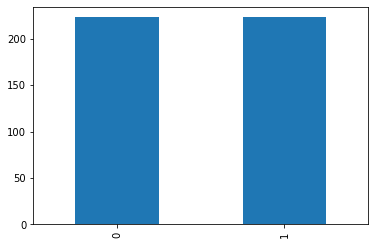

In [31]:
smote_sampler = SMOTE(random_state = 42)
x_smo, y_smo = smote_sampler.fit_resample(x_train, y_train)
y_smo.value_counts().plot.bar()

## 4. Building Classification ML models

Multiple models will be used to predict the presence of diabetes and the model with the highest f1 score will be selected.


### 1. Logistic regression

It estimates the probability of a patient being diabetic, based on the dataset containing symptoms (independent variables) . Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

The necessary libraries are imported next. The logistic function is defined as lr and the possible hyperparameters are loaded into the param_grid. GridSearch CV is then used to run multiple iterations of the same model with different hyperparameters, to find the set of hyperparameter that maximises the f1 score. The hyperparameters used here are:

a) Penalization parameter that selects between lasso, ridge and a combnation of both

b) C or regulatization parameter ranging from 0.0001 to 10000

c) Different solver functions

d) Diferent maximum values for model iteration

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


lr = LogisticRegression()
param_grid = [{'penalty': ['l1','l2','elasticnet','none'] , 'C': np.logspace(-4,4,9) ,'solver':['lbfgs','newton-cg','liblinear','sag','saga'], 'max_iter': [100,1000,2000,5000]}]

lrmodels = GridSearchCV( lr ,param_grid = param_grid,scoring='f1', cv=3, n_jobs =-1)
lrmodels.fit(x_smo, y_smo)
lrmodels.best_score_,lrmodels.best_params_

(0.8837381240890013,
 {'C': 1000.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'})

The .coef_ function is used to identify the coefficients of each of the independent variables and the results are tablulated against the name of the columns.

In [33]:
lrmodels.best_estimator_.coef_

array([[-0.06461385,  1.98865086,  4.01214576,  1.78352708, -0.12154461,
         1.26638282,  0.63121727,  0.90373799,  1.96596234,  1.375867  ,
        -1.09475915, -0.9901499 ]])

In [34]:
coef_table = pd.DataFrame(list(x_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lrmodels.best_estimator_.coef_.transpose())
coef_table

,0,Coefs
0,Age,-0.064614
1,Polyuria,1.988651
2,Polydipsia,4.012146
3,sudden weight loss,1.783527
4,weakness,-0.121545
5,Polyphagia,1.266383
6,Genital thrush,0.631217
7,visual blurring,0.903738
8,Irritability,1.965962
9,partial paresis,1.375867


The model is then run on the x_test set to produce predictions, that are then compared to y_test values by the classification_report function to obtain classification metrics that help assess the model. Yhat_prob is also predicted to determine the auc value.

In [35]:
yhat = lrmodels.predict(x_test)
yhat_prob = lrmodels.predict_proba(x_test)

In [36]:
yhat_prob

array([[9.22276285e-01, 7.77237149e-02],
       [2.14921568e-03, 9.97850784e-01],
       [9.12324025e-04, 9.99087676e-01],
       [3.22941453e-03, 9.96770585e-01],
       [7.85803256e-01, 2.14196744e-01],
       [8.13252304e-02, 9.18674770e-01],
       [9.34642252e-01, 6.53577479e-02],
       [2.14921568e-03, 9.97850784e-01],
       [1.31701635e-02, 9.86829837e-01],
       [1.27375829e-04, 9.99872624e-01],
       [7.71179741e-01, 2.28820259e-01],
       [8.75395988e-01, 1.24604012e-01],
       [9.60145091e-01, 3.98549091e-02],
       [9.54694845e-01, 4.53051554e-02],
       [9.16966931e-01, 8.30330690e-02],
       [7.71179741e-01, 2.28820259e-01],
       [3.08905928e-02, 9.69109407e-01],
       [1.04974077e-03, 9.98950259e-01],
       [9.75309393e-01, 2.46906072e-02],
       [6.91895241e-01, 3.08104759e-01],
       [4.53518750e-01, 5.46481250e-01],
       [9.46295118e-01, 5.37048821e-02],
       [8.03482879e-01, 1.96517121e-01],
       [3.46341186e-01, 6.53658814e-01],
       [6.128035

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        60
           1       0.97      0.88      0.92        96

    accuracy                           0.90       156
   macro avg       0.90      0.91      0.90       156
weighted avg       0.91      0.90      0.90       156

Area under the curve is
0.95


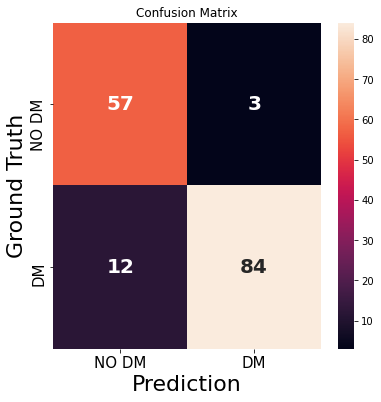

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,  roc_auc_score,f1_score

print (classification_report(y_test, yhat))
auc = roc_auc_score(y_test, yhat_prob[::,1], average='weighted')
print("Area under the curve is" )
print(auc)
cm= confusion_matrix(y_test, yhat)
fig, ax = plt.subplots(figsize=(6,6))  
ax.set(title = "Confusion Matrix")
sns.heatmap(cm,annot =True,ax=ax, annot_kws={"size":20,"weight":"bold"})
labels=["NO DM","DM"]
ax.set_xticklabels(labels,fontsize =15);
ax.set_yticklabels(labels,fontsize =15);
ax.set_ylabel('Ground Truth',fontsize =22);
ax.set_xlabel('Prediction',fontsize =22);




### 2. K nearest neighbors algorithm 

It stores all the available data and classifies a new data point based on the similarity to the nearest k pre-exsisting data points.This is done by calculating the distance between the new datapoint and the other datapoints and the k number of datapoints with the least distance are chosen. In order to find the best value of k, we run a loop where multiple models with k values ranging from 1 to 20 are trained and tested and their f1 scores are plotted. The K value at which the model performs the best is selected.
We then find the different classification metrics for the best model.


In [38]:
from sklearn.neighbors import KNeighborsClassifier
max_k =20
f1_scores =list()
error_rates= list()

for k in range(1,max_k):
    knn= KNeighborsClassifier(n_neighbors= k , weights='distance')
    knn= knn.fit(x_smo, y_smo)
    
    y_pred=knn.predict(x_test)
    f1 =f1_score(y_pred,y_test)
    f1_scores.append((k,round(f1,4)))
    
f1_results= pd.DataFrame(f1_scores,columns=['K','F1 Score'])

<Figure size 432x288 with 0 Axes>

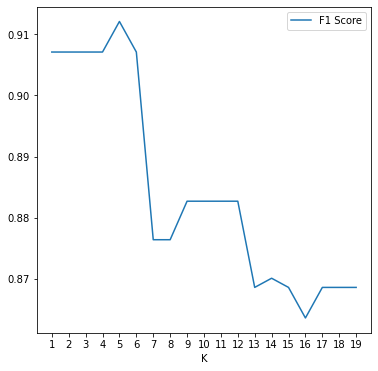

<Figure size 432x288 with 0 Axes>

In [39]:
ax= f1_results.set_index('K').plot(figsize=(6,6))
ax.set_xticks(range(1,max_k,1))
plt.figure()

In [40]:
f1_results

,K,F1 Score
0,1,0.9071
1,2,0.9071
2,3,0.9071
3,4,0.9071
4,5,0.9121
5,6,0.9071
6,7,0.8764
7,8,0.8764
8,9,0.8827
9,10,0.8827


In [41]:
knn= KNeighborsClassifier(n_neighbors= 5 , weights='distance')
knn= knn.fit(x_smo, y_smo)
    
y_predknn=knn.predict(x_test)

print(classification_report(y_predknn,y_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        70
           1       0.86      0.97      0.91        86

    accuracy                           0.90       156
   macro avg       0.91      0.89      0.89       156
weighted avg       0.90      0.90      0.90       156



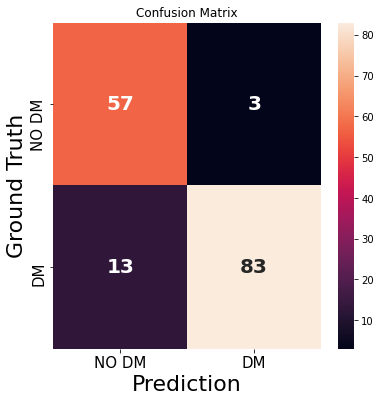

In [42]:
cm= confusion_matrix(y_test, y_predknn)
fig, ax = plt.subplots(figsize=(6,6))  
ax.set(title = "Confusion Matrix")
sns.heatmap(cm,annot =True,ax=ax, annot_kws={"size":20,"weight":"bold"})
labels=["NO DM","DM"]
ax.set_xticklabels(labels,fontsize =15);
ax.set_yticklabels(labels,fontsize =15);
ax.set_ylabel('Ground Truth',fontsize =22);
ax.set_xlabel('Prediction',fontsize =22);


### 3. Support Vector Machine

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane. GridSearch CV is used again to tune the different hyperparmeters to find the best fit. The classification report is then generated.

In [43]:
from sklearn.svm import SVC

svc = SVC()
param_grid = [{'gamma': [.5,1,2,10] , 'C': np.logspace(-2,2,5) }]

svc_models = GridSearchCV( svc ,param_grid = param_grid,scoring='f1', cv=4, n_jobs =-1)
svc_models.fit(x_smo, y_smo)
svc_models.best_score_,svc_models.best_params_

(0.9241257281673732, {'C': 1.0, 'gamma': 1})

In [44]:
y_predsvc = svc_models.predict(x_test)
print(classification_report(y_predsvc,y_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        53
           1       0.99      0.92      0.95       103

    accuracy                           0.94       156
   macro avg       0.93      0.95      0.94       156
weighted avg       0.95      0.94      0.94       156



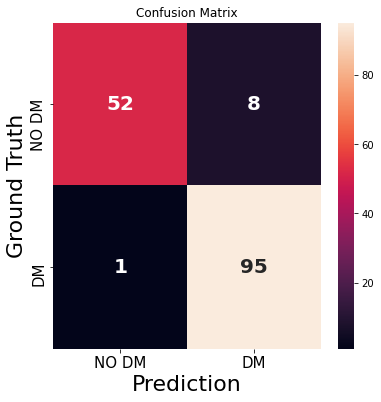

In [45]:
cm= confusion_matrix(y_test, y_predsvc)
fig, ax = plt.subplots(figsize=(6,6))  
ax.set(title = "Confusion Matrix")
sns.heatmap(cm,annot =True,ax=ax, annot_kws={"size":20,"weight":"bold"})
labels=["NO DM","DM"]
ax.set_xticklabels(labels,fontsize =15);
ax.set_yticklabels(labels,fontsize =15);
ax.set_ylabel('Ground Truth',fontsize =22);
ax.set_xlabel('Prediction',fontsize =22);


### Decision Tree Classifier

A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and the terminal nodes holds a class label. The splitting is completed when the subsets are homogenous, or when splitting no longer adds value to the predictions. GridSearchCV is used to build multiple models that have different depths (max layers in decision tree) and use different number of features( ranging from 1 to total number of features +1). 
The feature importances of each of the feaures are also assessed.
The classification report along with the decision tree and a confusion matrix are generated. 

In [46]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

dt= DecisionTreeClassifier(random_state =42)
dt= dt.fit(x_smo, y_smo)
dt.tree_.node_count, dt.tree_.max_depth,dt.feature_importances_

(69,
 12,
 array([0.13601413, 0.09476557, 0.52763535, 0.00849477, 0.05862934,
        0.00273973, 0.04422701, 0.04406522, 0.01743622, 0.02152648,
        0.02746974, 0.01699645]))

In [47]:
Feature_Imp = pd.DataFrame(list(x_train.columns)).copy()
Feature_Imp.insert(len(Feature_Imp.columns),"Feature_Imp",dt.feature_importances_.transpose())
Feature_Imp


,0,Feature_Imp
0,Age,0.136014
1,Polyuria,0.094766
2,Polydipsia,0.527635
3,sudden weight loss,0.008495
4,weakness,0.058629
5,Polyphagia,0.002740
6,Genital thrush,0.044227
7,visual blurring,0.044065
8,Irritability,0.017436
9,partial paresis,0.021526


In [48]:
param_grid = {'max_depth': range(1,dt.tree_.max_depth+1,2),'max_features':range(1,len(dt.feature_importances_)+1)}

dtmodels= GridSearchCV( dt ,param_grid = param_grid, cv=4,scoring='f1', n_jobs =-1)
dtmodels =dtmodels.fit(x_smo, y_smo)
dtmodels.best_estimator_.tree_.node_count,dtmodels.best_estimator_.tree_.max_depth

(93, 11)

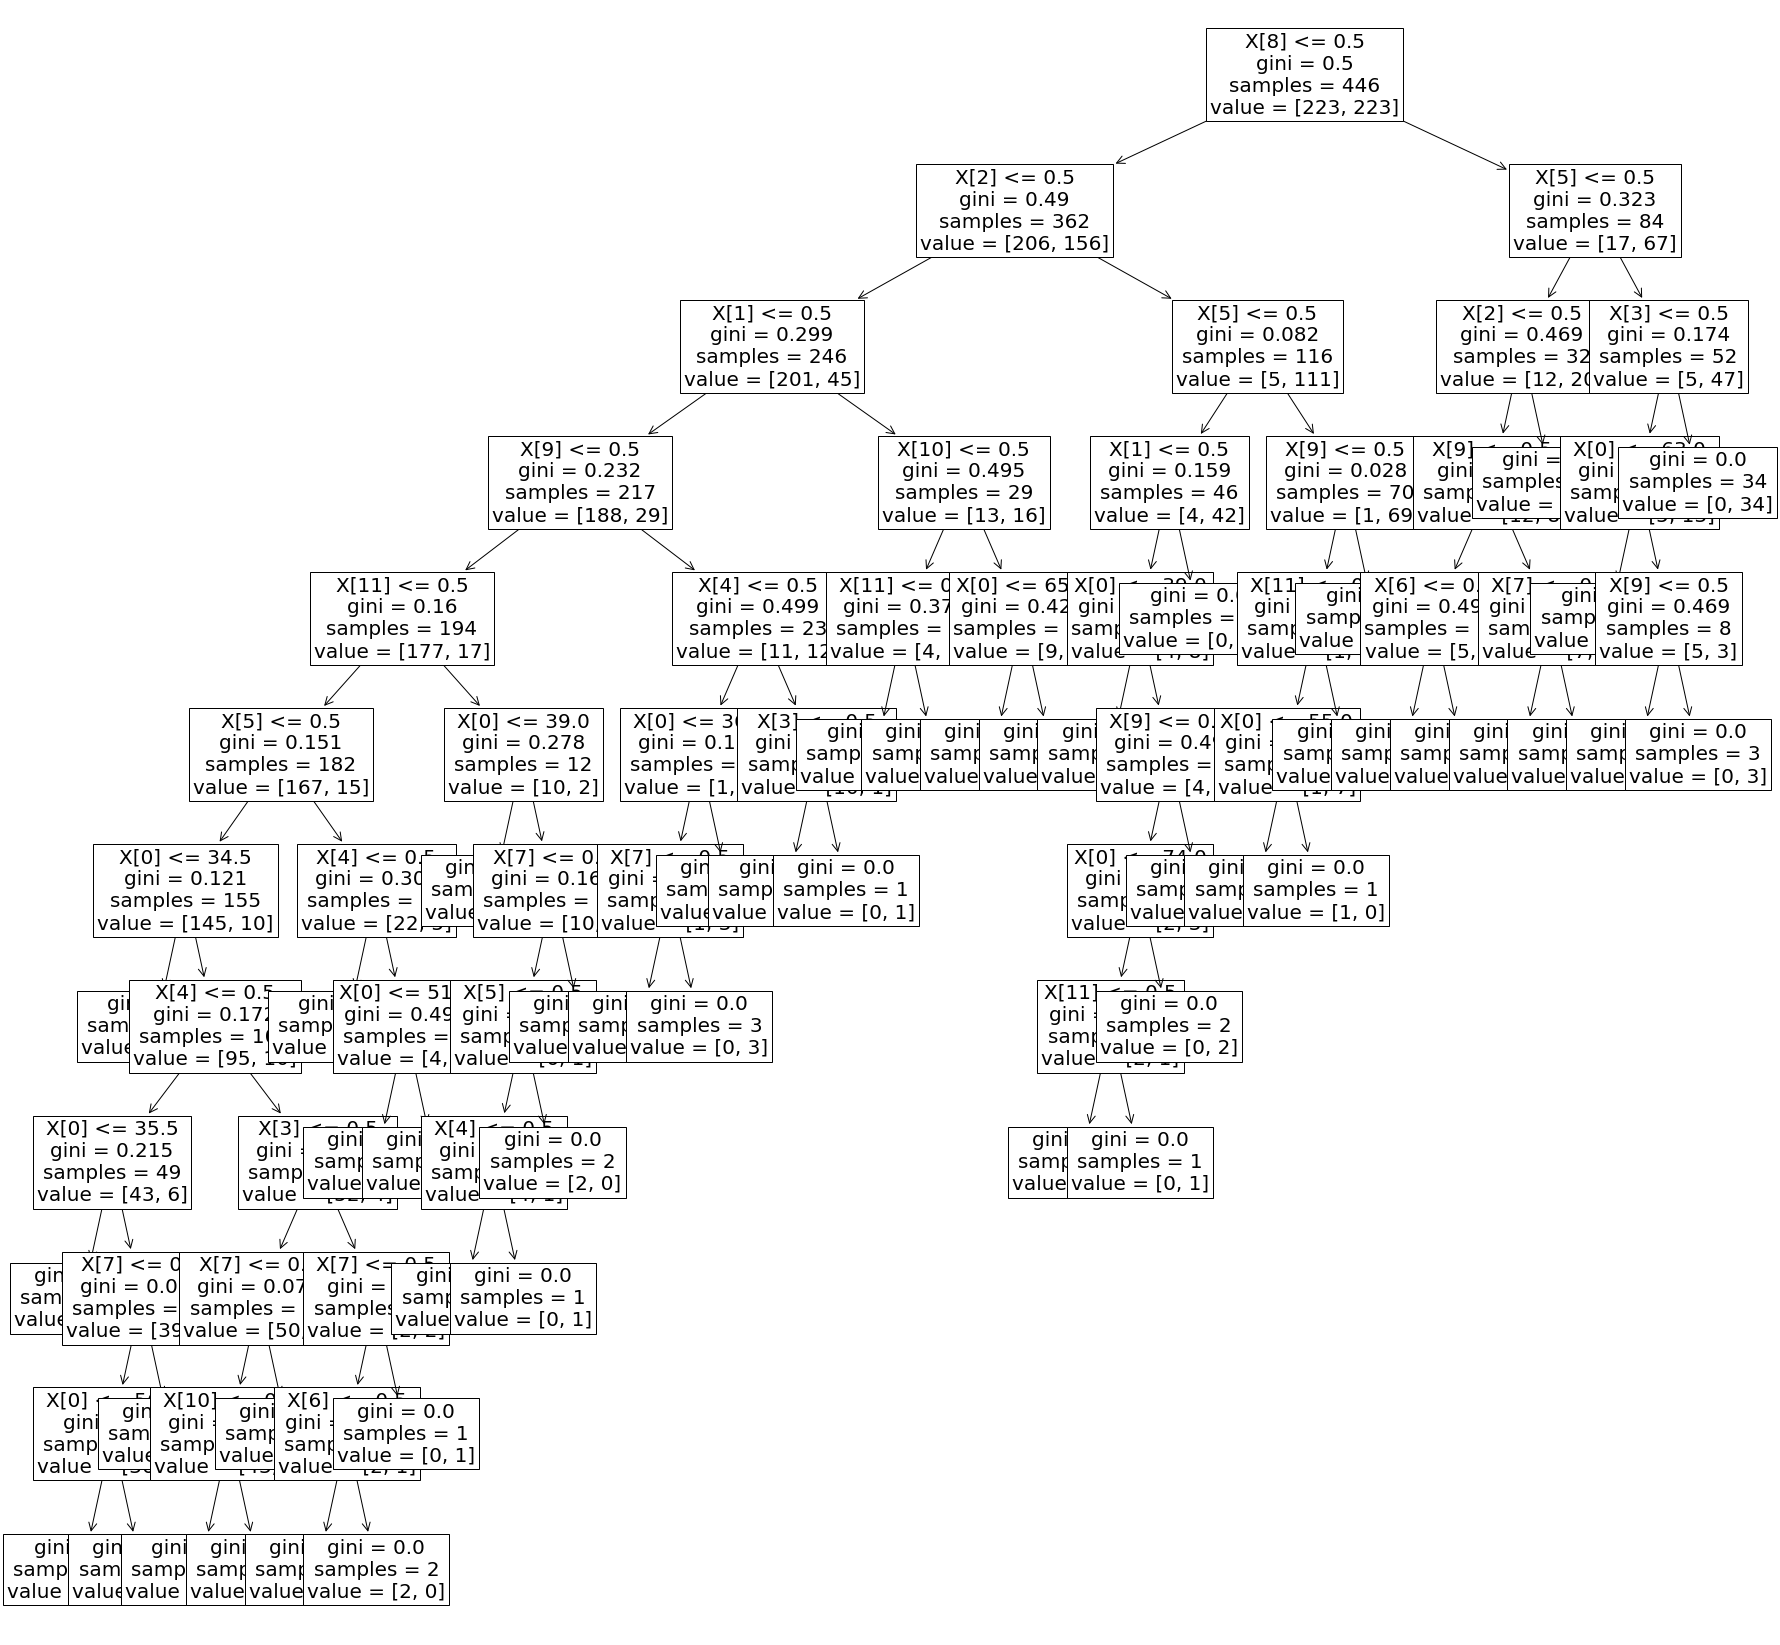

In [49]:
plt.figure(figsize=(30,30)) 
tree.plot_tree(dtmodels.best_estimator_,fontsize=20)
plt.show()


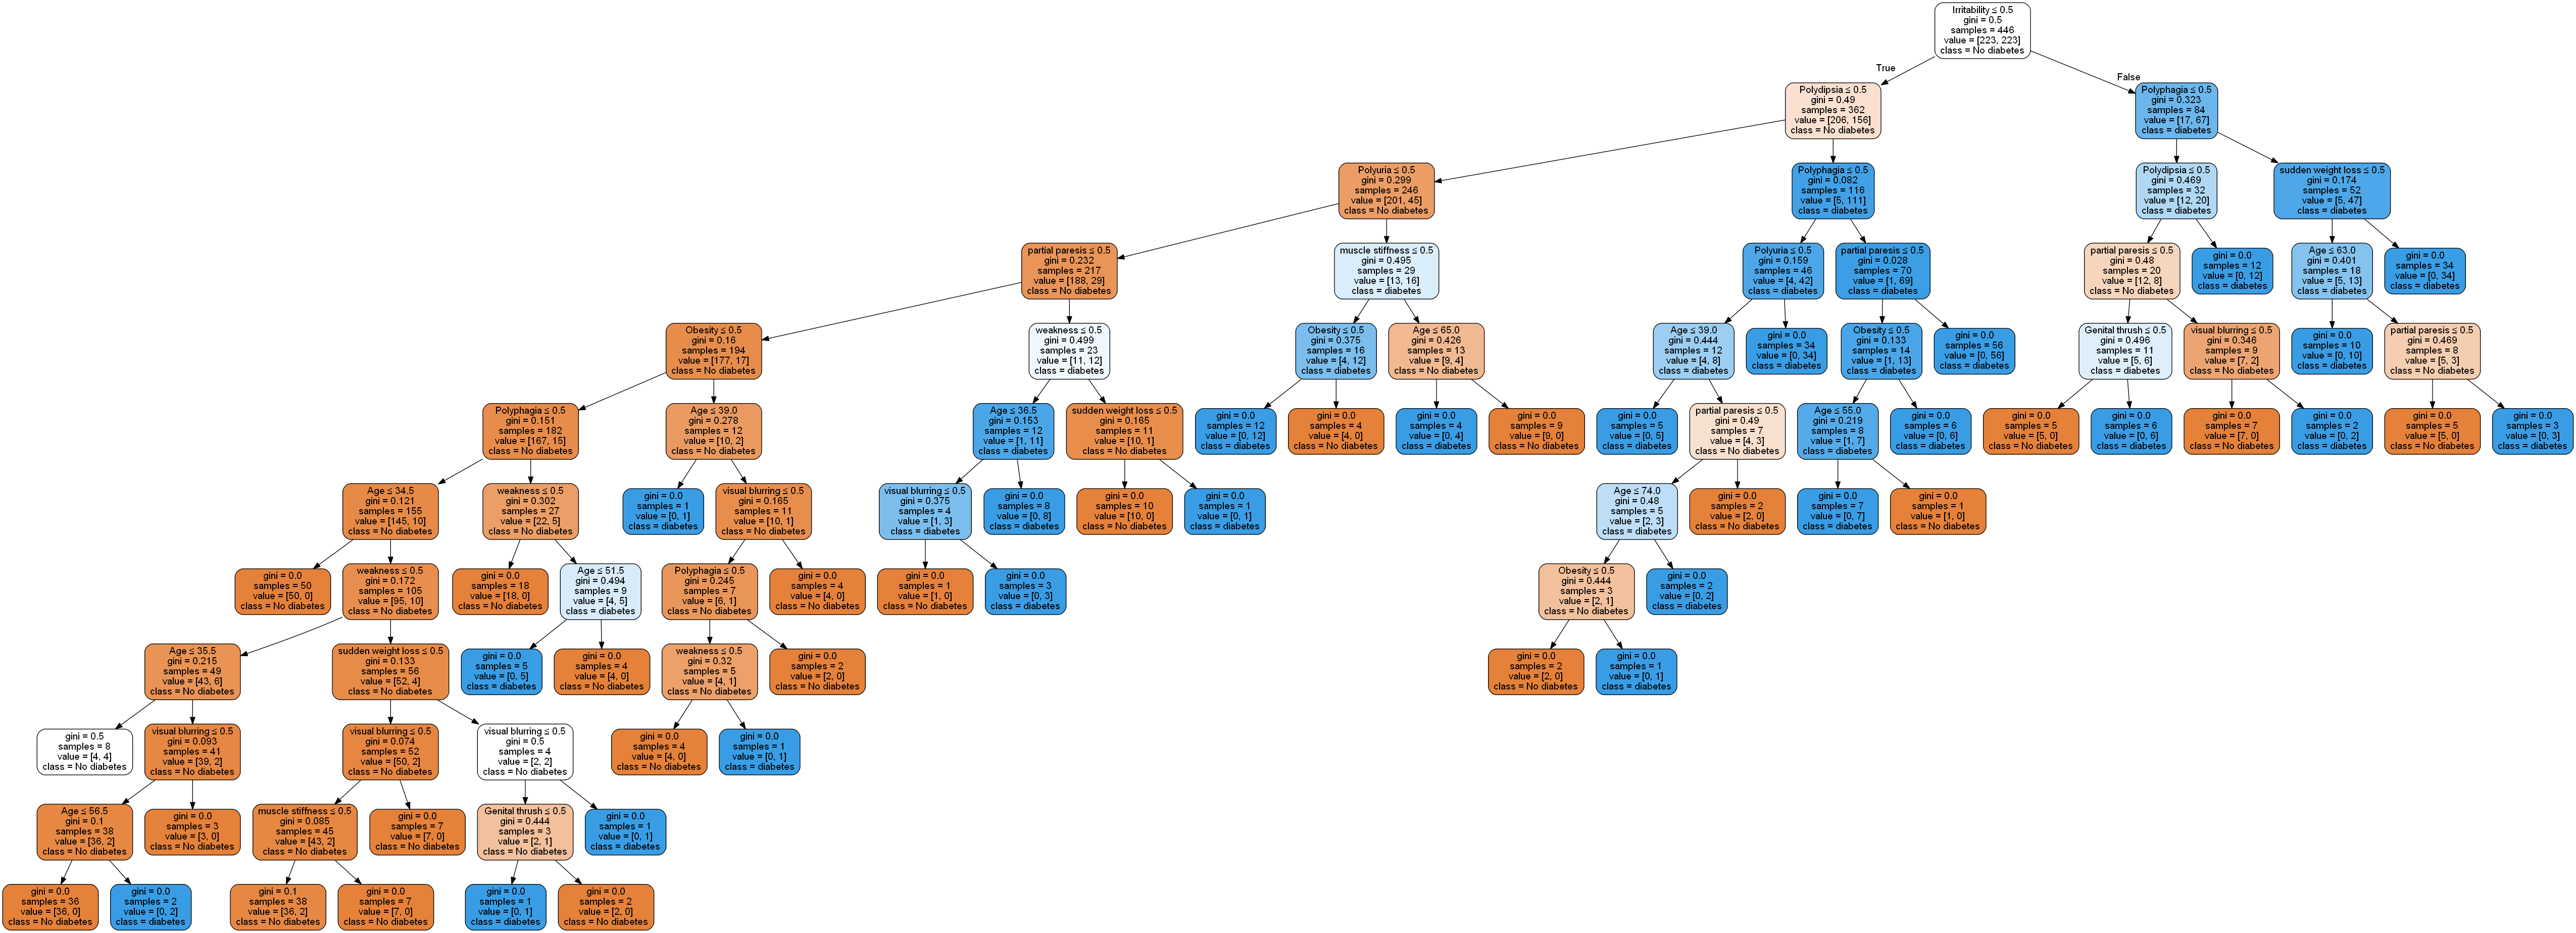

In [50]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
!pip install graphviz
!pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

import pydotplus  
dot_data = tree.export_graphviz(dtmodels.best_estimator_, out_file=None)  
graph = pydotplus.graph_from_dot_data(dot_data)  


from IPython.display import Image  
dot_data = tree.export_graphviz(dtmodels.best_estimator_, out_file=None,  
                     feature_names =x_train.columns, class_names = ["No diabetes", "diabetes"],  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())

In [51]:
y_preddt= dtmodels.predict(x_test)
print(classification_report(y_preddt,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        64
           1       0.96      1.00      0.98        92

    accuracy                           0.97       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.98      0.97      0.97       156



Max F1 score was achieved with the decision tree.